### Definition of the fucntions and their derivatives

In [41]:
from scipy.optimize import minimize_scalar
# function f
def f_x(x):
    return x**4 - 16*x**3 - 45*x**2 - 20*x + 203
# function g
def g_x(x):
    return -x**5 + 2*x**4 - 23*x**3 - 12*x**2 - 36*x
# fisrt derivative of f
def f_dx(x):
    return 4*x**3 - 48*x**2 - 90*x - 20
# first derivation of the function g 
def g_dx(x):
    return -5*x**4 + 8*x**3 - 69*x**2 - 24*x - 36

### One dimensional line search Algorithm

This is best solution with the line search algorithm for the function f : 13.672398601309396
This is best solution with the line search algorithm for the function g : 2.9999999962747097


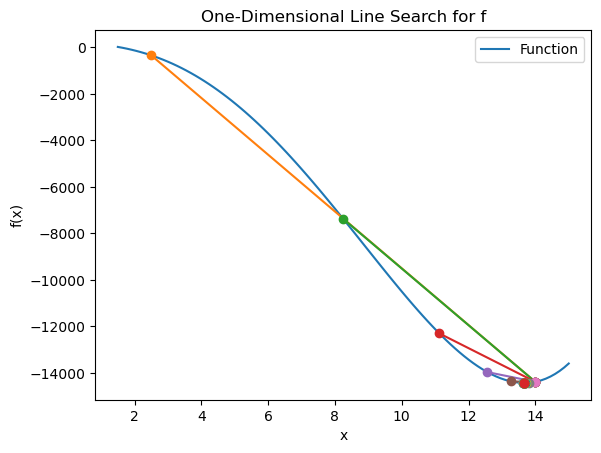

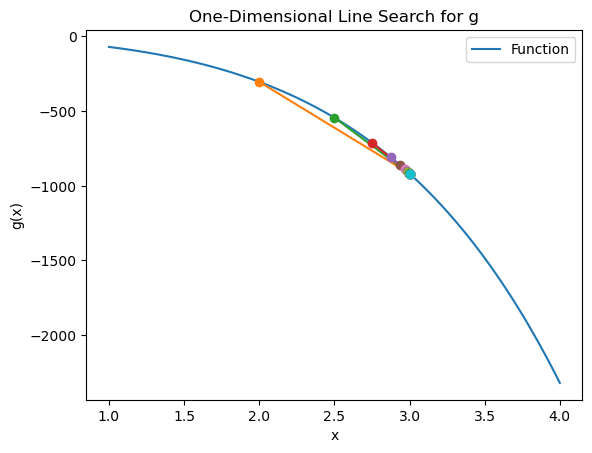

In [44]:
import numpy as np 
import matplotlib.pyplot as plt
def one_dimensional_line_search(f_x,f_dx,r_min,r_max,error):
    f_dmin = f_dx(r_min)
    f_dmax = f_dx(r_max)
    # This condition is to invert the upper and lower bounds to not have problem if the f_dx of the lower bounds is negative 
    if f_dmin <0:
        r_min,r_max = r_max,r_min
    bounds = [(r_min, r_max)]
    while True:
        # Calculate the intermediaire point 
        x = (r_min+r_max)/2
        # Calculate the fisrt derivative of the intermediaire point
        f_dx1=f_dx(x)
        # Changement of the bounds
        if f_dx1 >=0:
            r_min = x
        else:
            r_max = x
            
        bounds.append((r_min, r_max))
        
        # The stop condition which return the intermediate point
        if abs(r_max-r_min)<=error: # Error I chose to determinate the precision of my solution
            return x,bounds


f,f_bounds = one_dimensional_line_search(f_x,f_dx,2.5,14, 0.000000005)
print("This is best solution with the line search algorithm for the function f :",f)

g,g_bounds = one_dimensional_line_search(g_x,g_dx,2,3, 0.000000005)
print("This is best solution with the line search algorithm for the function g :",g)

# Plotting for function f_x
fx_vals = np.linspace(1.5, 15, 100)
fy_vals = f_x(fx_vals)

# Drawing of the tangents of f
plt.plot(fx_vals, fy_vals, label="Function")
for f_bound in f_bounds:
    plt.plot(f_bound, [f_x(b) for b in f_bound], marker='o')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('One-Dimensional Line Search for f')
plt.legend()
plt.show()


# Plotting for function g_x
gx_vals = np.linspace(1, 4, 100)
gy_vals = g_x(gx_vals)

# Drawing of the tangents of g
plt.plot(gx_vals, gy_vals, label="Function")
for g_bound in g_bounds:
    plt.plot(g_bound, [g_x(b) for b in g_bound], marker='o')

plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('One-Dimensional Line Search for g')
plt.legend()
plt.show()

### Golden search Algorithm

Best solution with the golden search algorithm for the function f: 13.672397484587318
Best solution with the golden search algorithm for the function g: 2.9999981579926542


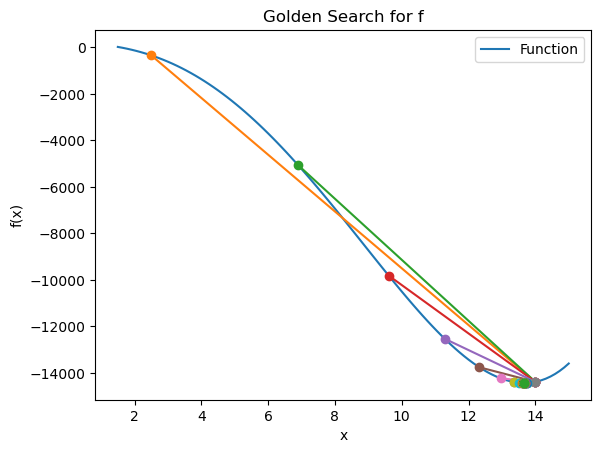

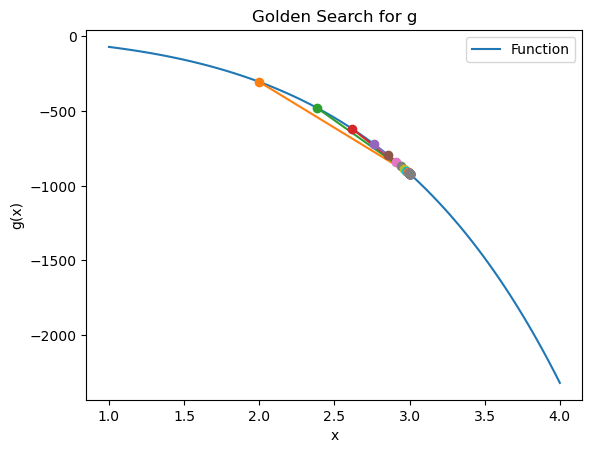

In [43]:
import math
def golden_search(f_x, a, b, error):
    # Calculate th egolden ratio
    golden_ratio = (math.sqrt(5) - 1) / 2
    # Determination of the new bounds inside the a and b bounds.
    c = b - golden_ratio * (b - a)
    d = a + golden_ratio * (b - a)
    # Definition of a list for the graphics
    bounds = [(a, b)]
    # Stop condition
    while abs(c - d) > error:
        # Changement of the bounds 
        if f_x(c) < f_x(d):
            b = d
        else:
            a = c
        # Determination of the new bounds inside the a and b bounds.
        c = b - golden_ratio * (b - a)
        d = a + golden_ratio * (b - a)
        bounds.append((a, b))
    return (b + a) / 2, bounds
# Error tolerance for golden search
error_tolerance = 1e-6

# Golden search for function f_x
optimal_solution_golden_f, golden_bounds_f= golden_search(f_x, 2.5, 14, error_tolerance)
print("Best solution with the golden search algorithm for the function f:", optimal_solution_golden_f)

# Golden search for function g_x
optimal_solution_golden_g, golden_bounds_g = golden_search(g_x, 2, 3, error_tolerance)
print("Best solution with the golden search algorithm for the function g:", optimal_solution_golden_g)

# Plotting for function f_x
fx_vals = np.linspace(1.5, 15, 100)
fy_vals = f_x(fx_vals)

# Drawing of the tangents of f
plt.plot(fx_vals, fy_vals, label="Function")
for bound in golden_bounds_f:
    plt.plot(bound, [f_x(b) for b in bound], marker='o')

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Golden Search for f')
plt.legend()
plt.show()

# Plotting for function g_x
gx_vals = np.linspace(1, 4, 100)
gy_vals = g_x(gx_vals)

# Drawing of the tangents of g
plt.plot(gx_vals, gy_vals, label="Function")
for bound in golden_bounds_g:
    plt.plot(bound, [g_x(b) for b in bound], marker='o')

plt.xlabel('x')
plt.ylabel('g(x)')
plt.title('Golden Search for g')
plt.legend()
plt.show()

### Scipy Solutions

In [19]:
# Utilisation of the function minimize_scalar from the scipy library to get the best solution for each function
f_bis = minimize_scalar(f_x, bounds=(2.5, 14), method='bounded')
print("This is best solution with the scipy library for the function f :", f_bis.x)

g_bis = minimize_scalar(g_x, bounds=(2, 3), method='bounded')
print("This is best solution with the scipy library for the function g :", g_bis.x)

This is best solution with the scipy library for the function f : 13.672398202257863
This is best solution with the scipy library for the function g : 2.999994039139014
